## 1. Import What We Need

In [39]:
#import regular functionalities that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from IPython.display import display

#stats imports
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

#classifiers to be used
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from imblearn.ensemble import BalancedRandomForestClassifier

#Model Selection Bits
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, KFold
from sklearn.model_selection import learning_curve, validation_curve

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import mode

#evaluation
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

#plotting
from sklearn.model_selection import learning_curve, validation_curve

#dataset
from sklearn.datasets import load_digits, make_classification

#pipelines
from sklearn.pipeline import Pipeline

## 2. Read the file

In [5]:
heart_disease_converted_df=pd.read_csv('heart_2020_converted.csv')

## 4. Clean the Data

In [7]:
heart_disease_converted_df.isna().sum()

HeartDisease                           0
BMI                                    0
Smoking                                0
AlcoholDrinking                        0
Stroke                                 0
PhysicalHealth                         0
MentalHealth                           0
DiffWalking                            0
Sex                                    0
AgeCategory                            0
PhysicalActivity                       0
GenHealth                              0
SleepTime                              0
Asthma                                 0
KidneyDisease                          0
SkinCancer                             0
Race_American Indian/Alaskan Native    0
Race_Asian                             0
Race_Black                             0
Race_Hispanic                          0
Race_Other                             0
Race_White                             0
Diabetic_No                            0
Diabetic_No, borderline diabetes       0
Diabetic_Yes    

In [8]:
#There are no blanks in the data

In [9]:
# Assuming 'HeartDisease' is the target variable (0 = No disease, 1 = Disease)
X = heart_disease_converted_df.drop(columns=["HeartDisease"])  # Features
y = heart_disease_converted_df["HeartDisease"]  # Target

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
# Check class distribution
print("Class distribution before SMOTE:\n", y.value_counts())

# Split data before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_train_sm).value_counts())

Class distribution before SMOTE:
 HeartDisease
0    292422
1     27373
Name: count, dtype: int64
Class distribution after SMOTE:
 HeartDisease
0    204695
1    204695
Name: count, dtype: int64


In [12]:
#Nomralize/Scale the Data
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test_sm = scaler.transform(X_test)

In [13]:
#Train RFC with BalancedRandomForestClassifer, not RandomForestClassifier
model = BalancedRandomForestClassifier(n_estimators=100, random_state=1010)
model.fit(X_train_sm, y_train_sm)

C:\Users\Frank Fassos\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Frank Fassos\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Frank Fassos\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
 

BalancedRandomForestClassifier(random_state=1010)

In [14]:
#Predict
y_pred = model.predict(X_test_sm)

In [15]:
#Try again but with ensemble (quick easy)
from imblearn.ensemble import BalancedRandomForestClassifier

# Train a Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)  # No SMOTE needed as this model balances data internally

# Predictions
y_pred_brf = brf.predict(X_test)

# Evaluate
print("\nBalanced Random Forest - Classification Report:\n", classification_report(y_test, y_pred_brf))

C:\Users\Frank Fassos\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Frank Fassos\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Frank Fassos\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
 


Balanced Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.71      0.82     87727
           1       0.21      0.79      0.33      8212

    accuracy                           0.72     95939
   macro avg       0.59      0.75      0.57     95939
weighted avg       0.91      0.72      0.78     95939



In [16]:
#Calculate accuracy, precision, f1
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     87727
           1       0.24      0.27      0.25      8212

    accuracy                           0.87     95939
   macro avg       0.59      0.59      0.59     95939
weighted avg       0.87      0.87      0.87     95939


Confusion Matrix:
 [[80951  6776]
 [ 6035  2177]]


In [41]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, brf.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {auc:.2f}")

ROC-AUC Score: 0.83


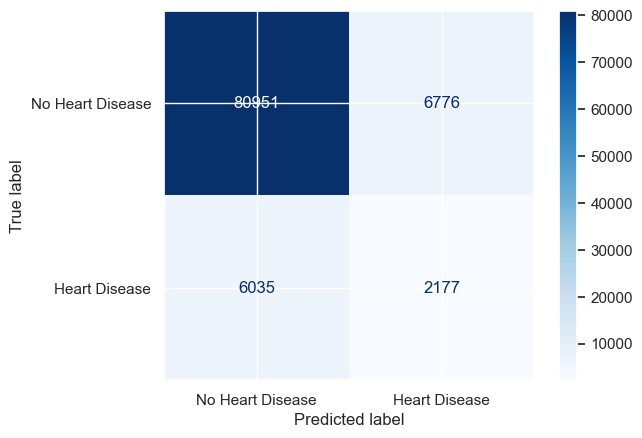

In [43]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='Blues')  # Plot confusion matrix with color map
plt.show()

In [45]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [46]:
#Improved recall to 0.79.
import xgboost as xgb

In [47]:
# Calculate class weight (useful if minority class is rare)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Train XGBoost
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("\nXGBoost - Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.84     87727
           1       0.22      0.77      0.34      8212

    accuracy                           0.75     95939
   macro avg       0.60      0.76      0.59     95939
weighted avg       0.91      0.75      0.80     95939



In [48]:
#XGBoost was 0.77

In [49]:
#Let's try with Ensemble, XGBoost, Logistic Regression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Define base classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
lr = LogisticRegression(class_weight="balanced", max_iter=1000)

# Voting classifier (soft voting improves recall)
voting_clf = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('lr', lr)], voting='soft')
voting_clf.fit(X_train, y_train)

# Predictions
y_pred_voting = voting_clf.predict(X_test)

# Evaluate
print("\nVoting Classifier - Classification Report:\n", classification_report(y_test, y_pred_voting))


Voting Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91     87727
           1       0.29      0.58      0.39      8212

    accuracy                           0.84     95939
   macro avg       0.62      0.72      0.65     95939
weighted avg       0.90      0.84      0.87     95939



In [50]:
#Ensemble, XGBoost, Logistic Regression was 0.58

In [57]:
##